# Match time vs Fairlay time differences

How much do Fairlay closing or soft change times differ from actual match start times.

## Setup

In [1]:
import os
if 'src' not in os.listdir():
    os.chdir("..")

In [2]:
import gzip
import json
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import src.load
import src.fairlay

In [3]:
pd.plotting.register_matplotlib_converters()

sns.set()

%matplotlib notebook

## Load data

### Fairlay data

In [4]:
with open('data/external/dota2_markets.20190831.pkl', 'rb') as fh:
    fairlay_df = pickle.load(fh)

In [5]:
sel = ((fairlay_df.dota_market_type == 'map')
       & (fairlay_df.Comp == 'Dota 2 - The International')
       & (fairlay_df.Status == 0))  # Only keep non-live games
fairlay_df = fairlay_df.loc[sel]

In [6]:
norm_team_names = \
    src.fairlay.munge_fairlay_json.compute_normalised_team_names(fairlay_df)
fairlay_df = pd.concat([fairlay_df, norm_team_names], 1)
fairlay_df['map_i'] = src.fairlay.munge_fairlay_json.compute_map_i(fairlay_df)
fairlay_df = fairlay_df.reset_index().set_index(
    ['ID', 'wager_type', 'norm_runner'])
fairlay_df

Comp  \
ID           wager_type norm_runner                                   
177220037121 against    TNC Predator     Dota 2 - The International   
177220037204 against    TNC Predator     Dota 2 - The International   
177220037121 against    TNC Predator     Dota 2 - The International   
177220037204 against    TNC Predator     Dota 2 - The International   
177220037121 against    TNC Predator     Dota 2 - The International   
...                                                             ...   
177943406427 against    Infamous Gaming  Dota 2 - The International   
                        Infamous Gaming  Dota 2 - The International   
             on         Infamous Gaming  Dota 2 - The International   
                        Infamous Gaming  Dota 2 - The International   
                        Infamous Gaming  Dota 2 - The International   

                                                                Title  \
ID           wager_type norm_runner                                     
177220037121 against    TNC Predator     TNC Predator vs. Keen Gaming   
177220037204 against    TNC Predator     TNC Predator vs. Keen Gaming   
177220037121 against    TNC Predator     TNC Predator vs. Keen Gaming   
177220037204 against    TNC Predator     TNC Predator vs. Keen Gaming   
177220037121 against    TNC Predator     TNC Predator vs. Keen Gaming   
...                                                               ...   
177943406427 against    Infamous Gaming      Infamous vs. Team Secret   
                        Infamous Gaming      Infamous vs. Team Secret   
             on         Infamous Gaming      Infamous vs. Team Secret   
                        Infamous Gaming      Infamous vs. Team Secret   
                        Infamous Gaming      Infamous vs. Team Secret   

                                           Descr dota_market_type  \
ID           wager_type norm_runner                                 
177220037121 against    TNC Predator     1st Map              map   
177220037204 against    TNC Predator     2nd Map              map   
177220037121 against    TNC Predator     1st Map              map   
177220037204 against    TNC Predator     2nd Map              map   
177220037121 against    TNC Predator     1st Map              map   
...                                          ...              ...   
177943406427 against    Infamous Gaming  3rd Map              map   
                        Infamous Gaming  3rd Map              map   
             on         Infamous Gaming  3rd Map              map   
                        Infamous Gaming  3rd Map              map   
                        Infamous Gaming  3rd Map              map   

                                                       LastSoftCh  \
ID           wager_type norm_runner                                 
177220037121 against    TNC Predator    2019-08-14 04:17:18-04:00   
177220037204 against    TNC Predator    2019-08-14 04:17:18-04:00   
177220037121 against    TNC Predator    2019-08-14 08:29:27-04:00   
177220037204 against    TNC Predator    2019-08-14 11:17:43-04:00   
177220037121 against    TNC Predator    2019-08-14 12:41:55-04:00   
...                                                           ...   
177943406427 against    Infamous Gaming 2019-08-23 01:28:16-04:00   
                        Infamous Gaming 2019-08-23 02:23:49-04:00   
             on         Infamous Gaming 2019-08-23 00:50:25-04:00   
                        Infamous Gaming 2019-08-23 01:28:16-04:00   
                        Infamous Gaming 2019-08-23 02:23:49-04:00   

                                                            ClosD  \
ID           wager_type norm_runner                                 
177220037121 against    TNC Predator    2019-08-14 20:59:15-04:00   
177220037204 against    TNC Predator    2019-08-14 20:59:15-04:00   
177220037121 against    TNC Predator    2019-08-14 20:59:15-04:00   
177220037204 against    TNC Predator    2019-08-

### Datdota matches

In [7]:
with gzip.open('data/raw/premium_matches.2019-08-31.json.gz', 'rb') as fh:
    matches = src.load.MatchDF.from_json(json.load(fh)['data'])

In [8]:
matches.df

,startDate,league_name,radiant_name,dire_name,radiantVictory,radiant_nicknames,dire_nicknames,seriesId,duration,radiant_valveId,radiant_players,dire_valveId,dire_players,league_id,startTimestamp,series_start_time,match_i_in_series
matchId,,,,,,,,,,,,,,,,,
3810442630,2018-04-01 04:00:22,Dota 2 Asia Championships 2018,TNC Predator,Vici Gaming,True,"[Raven, TIMS, Armel, Kuku, Sam H]","[old LaNm, Ori, Fenrir, old eLeVeN, Paparazi]",-3810442630,1941,2108395,"[132309493, 155494381, 164532005, 184950344, 1...",726228,"[89423756, 107803494, 113800818, 134276083, 13...",9643,1522555222000,1522555222000,0
3810503944,2018-04-01 04:59:14,Dota 2 Asia Championships 2018,PSG.LGD,OG,False,"[xNova, Chalice, fy, Somnus丶M, Ame]","[n0tail, JerAx, s4, 7ckngMad, Fly]",-3810503944,2940,15,"[94296097, 94738847, 101695162, 106863163, 177...",2586976,"[19672354, 26771994, 41231571, 88271237, 94155...",9643,1522558754000,1522558754000,0
3810509929,2018-04-01 05:04:38,Dota 2 Asia Championships 2018,INVICTUS GAMING,VGJ Thunder,True,"[Xxs, Agressif, Q, Srf, BoBoKa]","[Sylar, ddc, Freeze, Yang, Fade]",-3810509929,2385,5,"[129958758, 130416036, 140153524, 156662698, 2...",5027210,"[108382060, 114239371, 137272985, 139937922, 1...",9643,1522559078000,1522559078000,0
3810591728,2018-04-01 06:13:31,Dota 2 Asia Championships 2018,OpTic Gaming,KEEN GAMING,False,"[zai, 33, ppd, Pajkatt, CCnC]","[old chicken, yoona, 天命, MS, dark]",-3810591728,2811,5026801,"[73562326, 86698277, 86727555, 87285329, 22166...",2626685,"[135878232, 142974425, 158847773, 254710104, 3...",9643,1522563211000,1522563211000,0
3810598478,2018-04-01 06:18:32,Dota 2 Asia Championships 2018,Effect,paiN Gaming,True,"[Afoninje, Resolut1on, AfterLife, Maden, KingR]","[Kingrd, hFn, Arms, Duster, tavo]",-3810598478,1464,5197722,"[81852496, 86725175, 86785083, 93473848, 18299...",67,"[84853828, 94004717, 101062921, 116525052, 117...",9643,1522563512000,1522563512000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985891168,2019-08-25 06:12:23,The International 2019,PSG.LGD,Team Liquid,False,"[xNova, Chalice, fy, Somnus丶M, Ame]","[MinD_ContRoL, KuroKy, w33, GH, Miracle]",360881,2194,15,"[94296097, 94738847, 101695162, 106863163, 177...",2163,"[34505203, 82262664, 86700461, 101356886, 1052...",10749,1566713543000,1566703068000,2
4986133311,2019-08-25 08:33:12,The International 2019,Team Liquid,OG,True,"[MinD_ContRoL, KuroKy, w33, GH, Miracle]","[n0tail, JerAx, 7ckngMad, topson, ana]",360940,2914,2163,"[34505203, 82262664, 86700461, 101356886, 1052...",2586976,"[19672354, 26771994, 88271237, 94054712, 31136...",10749,1566721992000,1566721992000,0
4986260666,2019-08-25 09:51:46,The International 2019,Team Liquid,OG,False,"[MinD_ContRoL, KuroKy, w33, GH, Miracle]","[n0tail, JerAx, 7ckngMad, topson, ana]",360940,1945,2163,"[34505203, 82262664, 86700461, 101356886, 1052...",2586976,"[19672354, 26771994, 88271237, 94054712, 31136...",10749,1566726706000,1566721992000,1


## Combined Datdota and Fairlay matches

In [9]:
def plot_identity(ax):
    low_x, high_x = ax.get_xlim()
    low_y, high_y = ax.get_ylim()
    low = min(low_x, low_y)
    high = max(high_x, high_y)
    ax.plot([low, high], [low, high], '--', color='grey', zorder=0)

### LastSoftCh

In [10]:
fairlay_df_f = (fairlay_df.reset_index().drop_duplicates(['ID', 'LastSoftCh'])
                .set_index('ID'))

In [11]:
match_id = matches.query_maps(fairlay_df_f.team_1, fairlay_df_f.team_2,
                              fairlay_df_f.map_i, fairlay_df_f.LastSoftCh)

matched_fairlay = pd.concat(
    [fairlay_df_f,
     matches.df.reindex(match_id.map_id).set_index(fairlay_df_f.index)],
    1
)
matched_fairlay.startDate = \
    matched_fairlay.startDate.dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

<IPython.core.display.Javascript object>


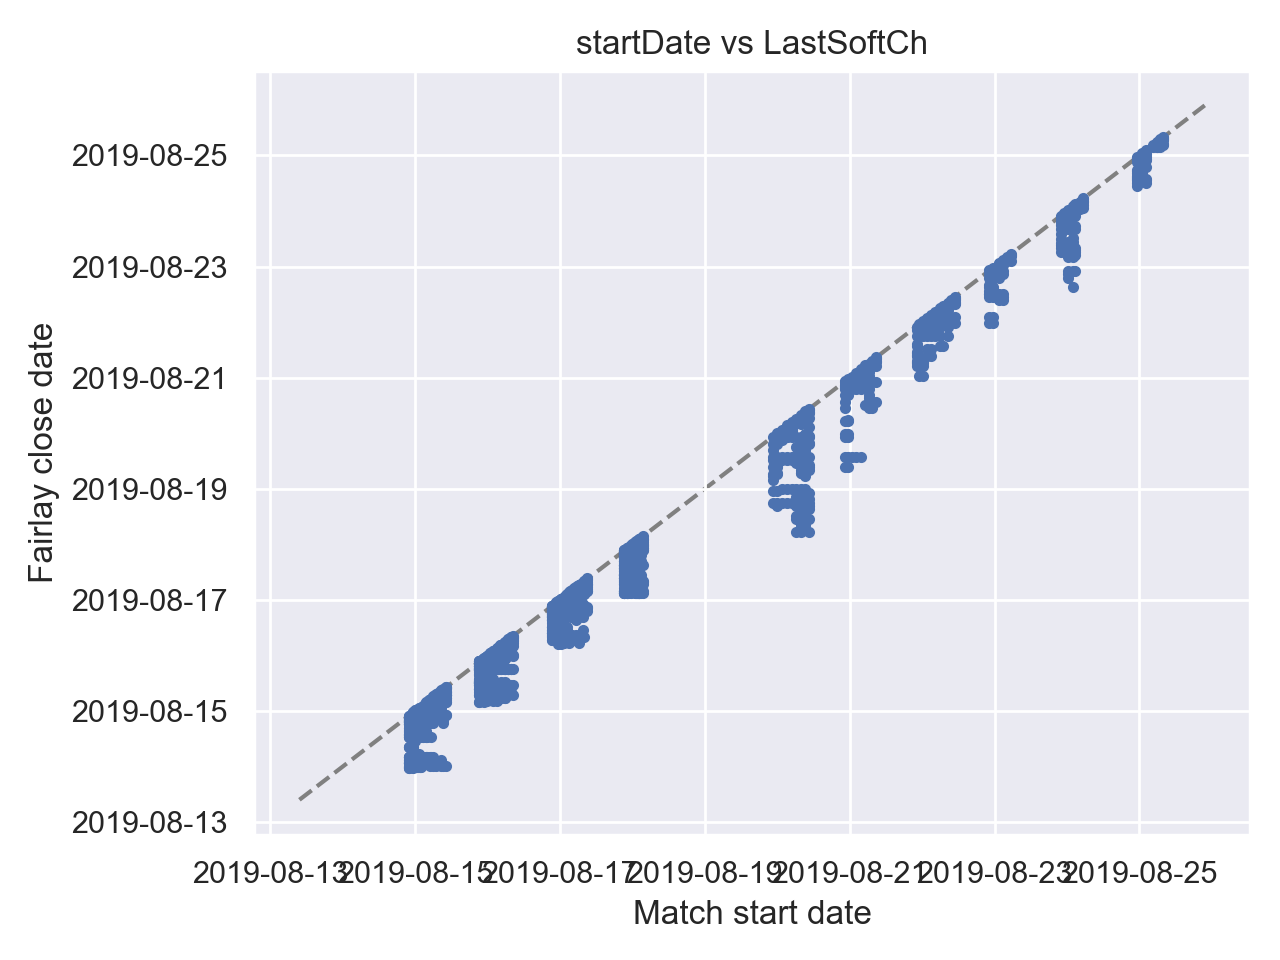

Timedelta('-3 days +18:52:09')

Timedelta('0 days 00:27:20')

In [12]:
fig, ax = plt.subplots()
sel = (matched_fairlay.startDate - matched_fairlay.LastSoftCh).dt.days > -5
ax.plot(matched_fairlay.startDate[sel], matched_fairlay.LastSoftCh[sel], '.')
ax.set_xlabel('Match start date')
ax.set_ylabel('Fairlay close date')
ax.set_title('startDate vs LastSoftCh')
plot_identity(ax)
fig.tight_layout()

display(min(matched_fairlay.LastSoftCh[sel] - matched_fairlay.startDate[sel]))
display(max(matched_fairlay.LastSoftCh[sel] - matched_fairlay.startDate[sel]))

<IPython.core.display.Javascript object>


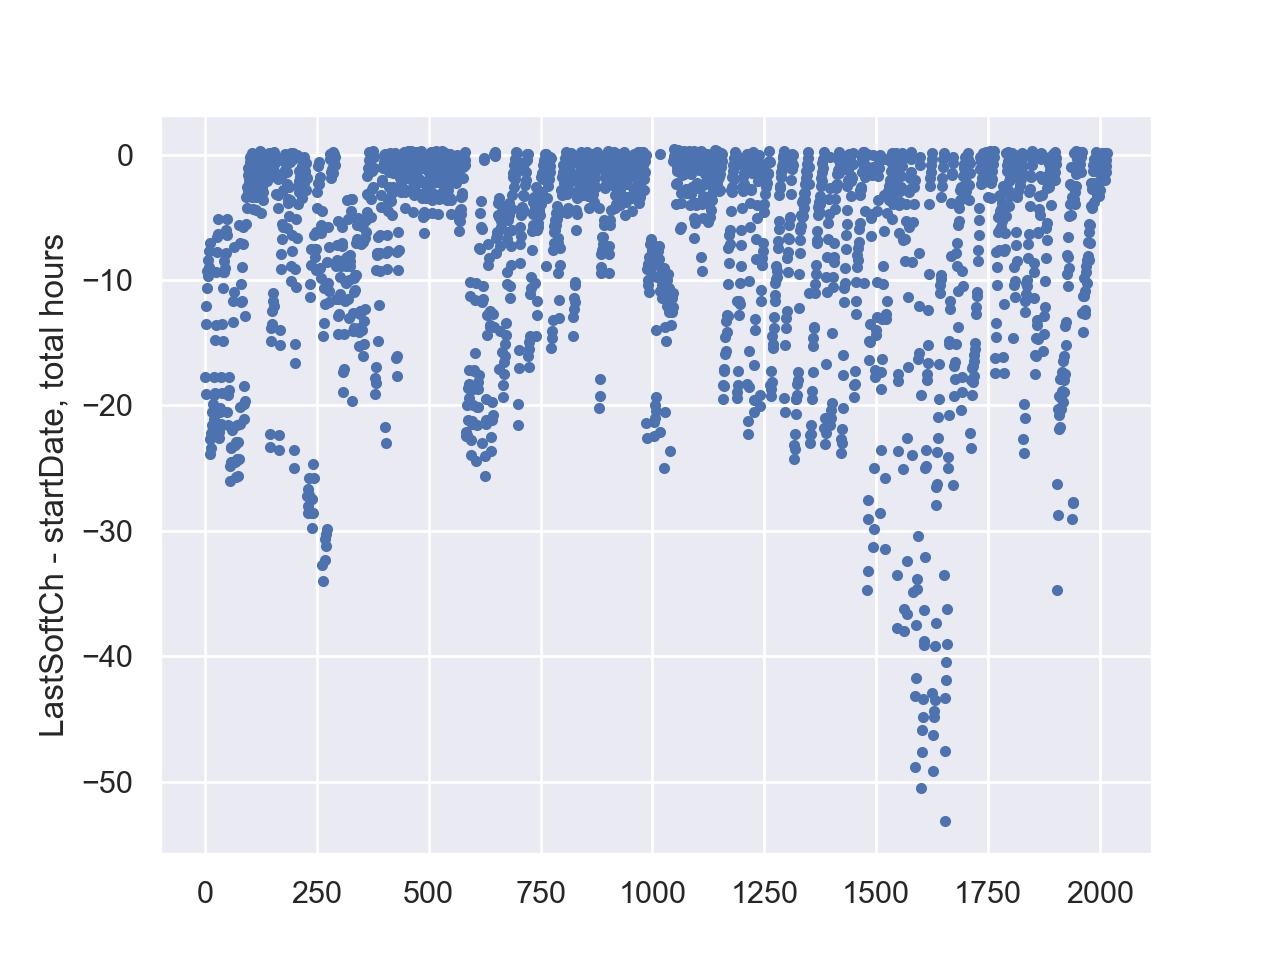

Text(0, 0.5, 'LastSoftCh - startDate, total hours')

In [13]:
fig, ax = plt.subplots()
ax.plot((matched_fairlay.LastSoftCh[sel] - matched_fairlay.startDate[sel]).dt.total_seconds().values / 60 / 60, '.')
ax.set_ylabel('LastSoftCh - startDate, total hours')

Last soft change can be as much as 0.5 hours after match start. Last soft change can also be as much as two days behind the match start date.

### ClosD

In [14]:
fairlay_df_f = (fairlay_df.reset_index().drop_duplicates(['ID', 'ClosD'])
                .set_index('ID'))
fairlay_df_f

,wager_type,norm_runner,Comp,Title,Descr,dota_market_type,LastSoftCh,ClosD,RunnerName,handicap,...,Margin,RunnerVisDelay,RunnerRedA,OrdBStr_S,MarketType,MarketPeriod,MarketCat,team_1,team_2,map_i
ID,,,,,,,,,,,,,,,,,,,,,
177220037121,against,TNC Predator,Dota 2 - The International,TNC Predator vs. Keen Gaming,1st Map,map,2019-08-14 04:17:18-04:00,2019-08-14 20:59:15-04:00,TNC Predator,0.0,...,104.775,6000,0.0,0,MONEYLINE,UNDEFINED,eSports,TNC Predator,Keen Gaming,0
177220037204,against,TNC Predator,Dota 2 - The International,TNC Predator vs. Keen Gaming,2nd Map,map,2019-08-14 04:17:18-04:00,2019-08-14 20:59:15-04:00,TNC Predator,0.0,...,104.775,6000,0.0,0,MONEYLINE,UNDEFINED,eSports,TNC Predator,Keen Gaming,1
177218520623,against,Team Secret,Dota 2 - The International,Team Secret vs. Alliance,1st Map,map,2019-08-13 23:23:11-04:00,2019-08-14 20:59:51-04:00,Team Secret,0.0,...,104.789,6000,0.0,0,MONEYLINE,UNDEFINED,eSports,Team Secret,Alliance,0
177218529861,against,Team Secret,Dota 2 - The International,Team Secret vs. Alliance,2nd Map,map,2019-08-13 23:23:21-04:00,2019-08-14 20:59:51-04:00,Team Secret,0.0,...,104.789,6000,0.0,0,MONEYLINE,UNDEFINED,eSports,Team Secret,Alliance,1
177218614562,against,Team Liquid,Dota 2 - The International,Team Liquid vs. Newbee,1st Map,map,2019-08-13 23:24:46-04:00,2019-08-14 20:59:54-04:00,Team Liquid,0.0,...,104.763,6000,0.0,0,MONEYLINE,UNDEFINED,eSports,Team Liquid,Newbee,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178182389182,against,OG,Dota 2 - The International,OG vs. Team Liquid,1st Map,map,2019-08-25 03:39:40-04:00,2019-08-26 02:58:43-04:00,OG,0.0,...,104.676,6000,0.0,0,MONEYLINE,UNDEFINED,eSports,OG,Team Liquid,0
178182389538,against,OG,Dota 2 - The International,OG vs. Team Liquid,4th Map,map,2019-08-25 04:29:53-04:00,2019-08-26 02:58:43-04:00,OG,0.0,...,104.764,6000,0.0,0,MONEYLINE,UNDEFINED,eSports,OG,Team Liquid,3
178182404244,against,OG,Dota 2 - The International,OG vs. Team Liquid,5th Map,map,2019-08-25 05:02:02-04:00,2019-08-26 02:58:43-04:00,OG,0.0,...,104.764,6000,0.0,0,MONEYLINE,UNDEFINED,eSports,OG,Team Liquid,4


In [15]:
match_id = matches.query_maps(fairlay_df_f.team_1, fairlay_df_f.team_2,
                              fairlay_df_f.map_i, fairlay_df_f.ClosD)

matched_fairlay = pd.concat(
    [fairlay_df_f,
     matches.df.reindex(match_id.map_id).set_index(fairlay_df_f.index)],
    1
)
matched_fairlay.startDate = \
    matched_fairlay.startDate.dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

<IPython.core.display.Javascript object>


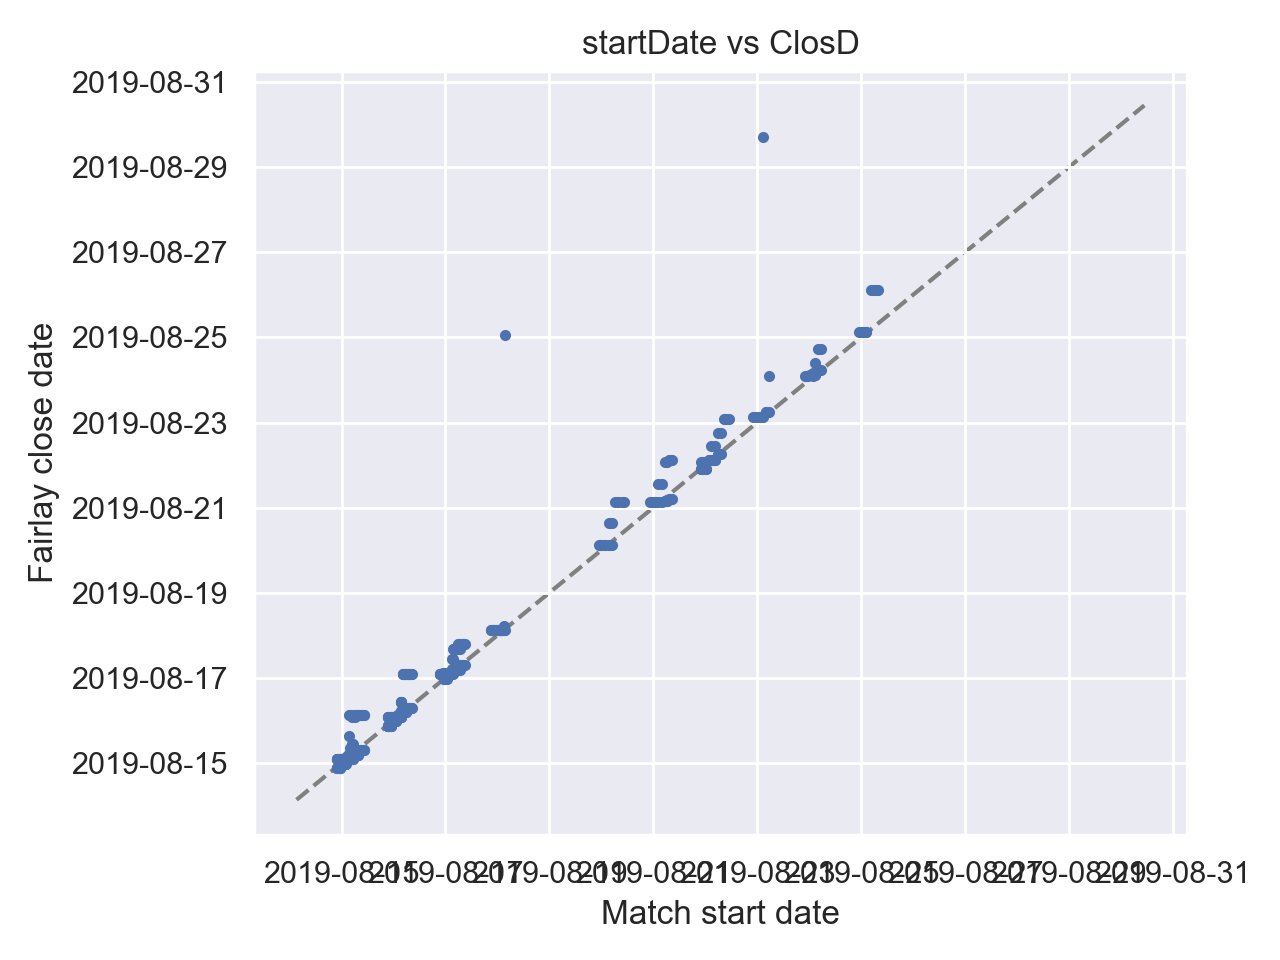

Timedelta('-1 days +20:20:02')

Timedelta('6 days 22:10:31')

ID
178182389182   0 days 22:25:31
177220793035   0 days 23:09:00
177220925204   0 days 23:23:12
177943406339   6 days 14:13:52
177491191701   6 days 22:10:31
dtype: timedelta64[ns]

In [16]:
fig, ax = plt.subplots()
sel = (matched_fairlay.startDate - matched_fairlay.ClosD).dt.days > -30
ax.plot(matched_fairlay.startDate[sel], matched_fairlay.ClosD[sel], '.')
ax.set_xlabel('Match start date')
ax.set_ylabel('Fairlay close date')
ax.set_title('startDate vs ClosD')
plot_identity(ax)
fig.tight_layout()

display(min(matched_fairlay.ClosD[sel] - matched_fairlay.startDate[sel]))
display(max(matched_fairlay.ClosD[sel] - matched_fairlay.startDate[sel]))
display((matched_fairlay.ClosD[sel] - matched_fairlay.startDate[sel])
        .sort_values().tail())

<IPython.core.display.Javascript object>


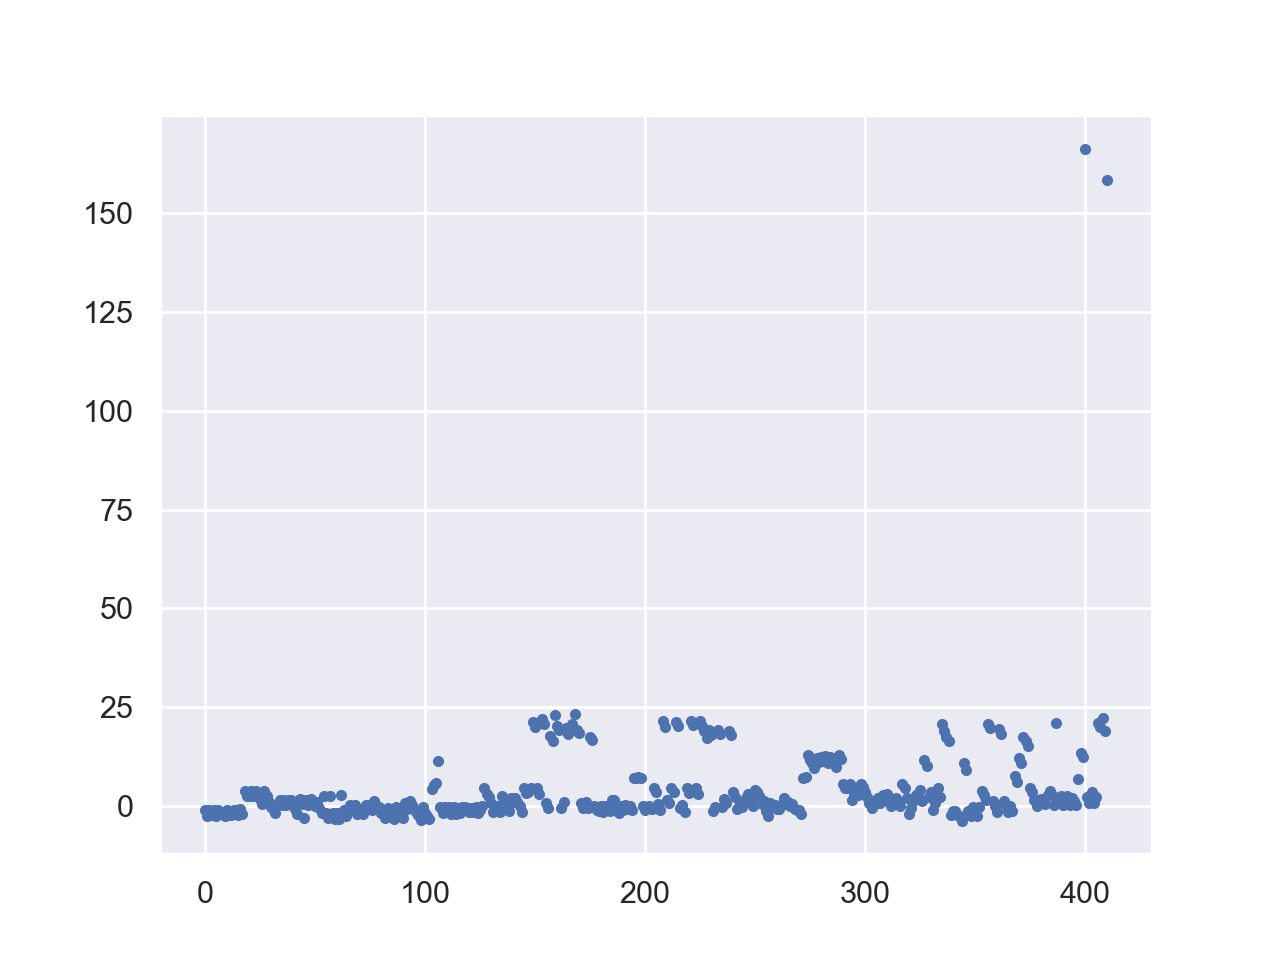

In [17]:
fig, ax = plt.subplots()
ax.plot((matched_fairlay.ClosD[sel] - matched_fairlay.startDate[sel]).dt.total_seconds().values / 60 / 60, '.')

Close dates range from 4 hours before the map start to almost 7 days after in two cases. Disregarding the two outliers, close date tends to be up to 24 hours after the match actually started.

In [18]:
is_large_diff = \
    (((matched_fairlay.startDate - matched_fairlay.ClosD).dt.days < -5)
     & ((matched_fairlay.startDate - matched_fairlay.ClosD).dt.days > -30))
display(matched_fairlay.loc[
    is_large_diff, ['startDate'] + matched_fairlay.columns.to_list()])

,startDate,wager_type,norm_runner,Comp,Title,Descr,dota_market_type,LastSoftCh,ClosD,RunnerName,...,seriesId,duration,radiant_valveId,radiant_players,dire_valveId,dire_players,league_id,startTimestamp,series_start_time,match_i_in_series
ID,,,,,,,,,,,,,,,,,,,,,
177491191701,2019-08-18 03:28:25-04:00,against,Vici Gaming,Dota 2 - The International,Vici Gaming vs. OG,2nd Map,map,2019-08-18 03:29:58-04:00,2019-08-25 01:38:56-04:00,Vici Gaming,...,359053,2312.0,2586976.0,"[19672354, 26771994, 88271237, 94054712, 31136...",726228.0,"[107803494, 137193239, 139937922, 143693439, 1...",10749.0,1.566113e+12,1.566109e+12,1.0
177943406339,2019-08-23 02:53:15-04:00,against,Infamous Gaming,Dota 2 - The International,Infamous vs. Team Secret,2nd Map,map,2019-08-23 00:50:25-04:00,2019-08-29 17:07:07-04:00,Infamous,...,360268,2059.0,1838315.0,"[73562326, 87278757, 89117038, 116585378, 1217...",2672298.0,"[119631156, 153836240, 157989498, 164685175, 2...",10749.0,1.566543e+12,1.566538e+12,1.0


### LastCh

In [19]:
fairlay_df_f = (fairlay_df.reset_index().drop_duplicates(['ID', 'LastCh'])
                .set_index('ID'))

In [20]:
match_id = matches.query_maps(fairlay_df_f.team_1, fairlay_df_f.team_2,
                              fairlay_df_f.map_i, fairlay_df_f.LastCh)

matched_fairlay = pd.concat(
    [fairlay_df_f,
     matches.df.reindex(match_id.map_id).set_index(fairlay_df_f.index)],
    1
)
matched_fairlay.startDate = \
    matched_fairlay.startDate.dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

<IPython.core.display.Javascript object>


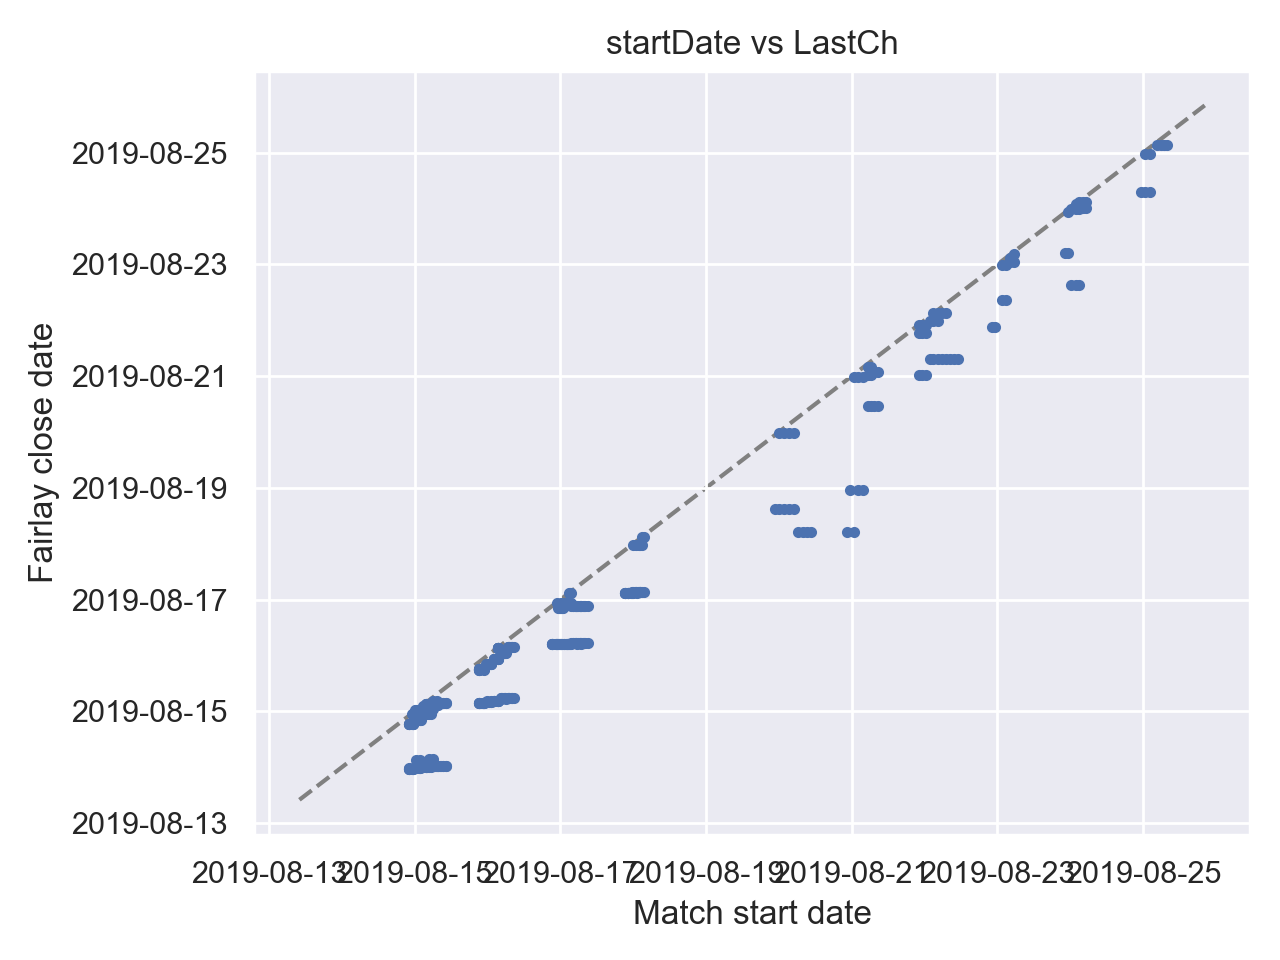

Timedelta('-3 days +04:25:36')

Timedelta('0 days 00:10:52')

In [21]:
fig, ax = plt.subplots()
sel = (matched_fairlay.startDate - matched_fairlay.LastCh).dt.days > -5
ax.plot(matched_fairlay.startDate[sel], matched_fairlay.LastCh[sel], '.')
ax.set_xlabel('Match start date')
ax.set_ylabel('Fairlay close date')
ax.set_title('startDate vs LastCh')
plot_identity(ax)
fig.tight_layout()

display(min(matched_fairlay.LastCh[sel] - matched_fairlay.startDate[sel]))
display(max(matched_fairlay.LastCh[sel] - matched_fairlay.startDate[sel]))

<IPython.core.display.Javascript object>


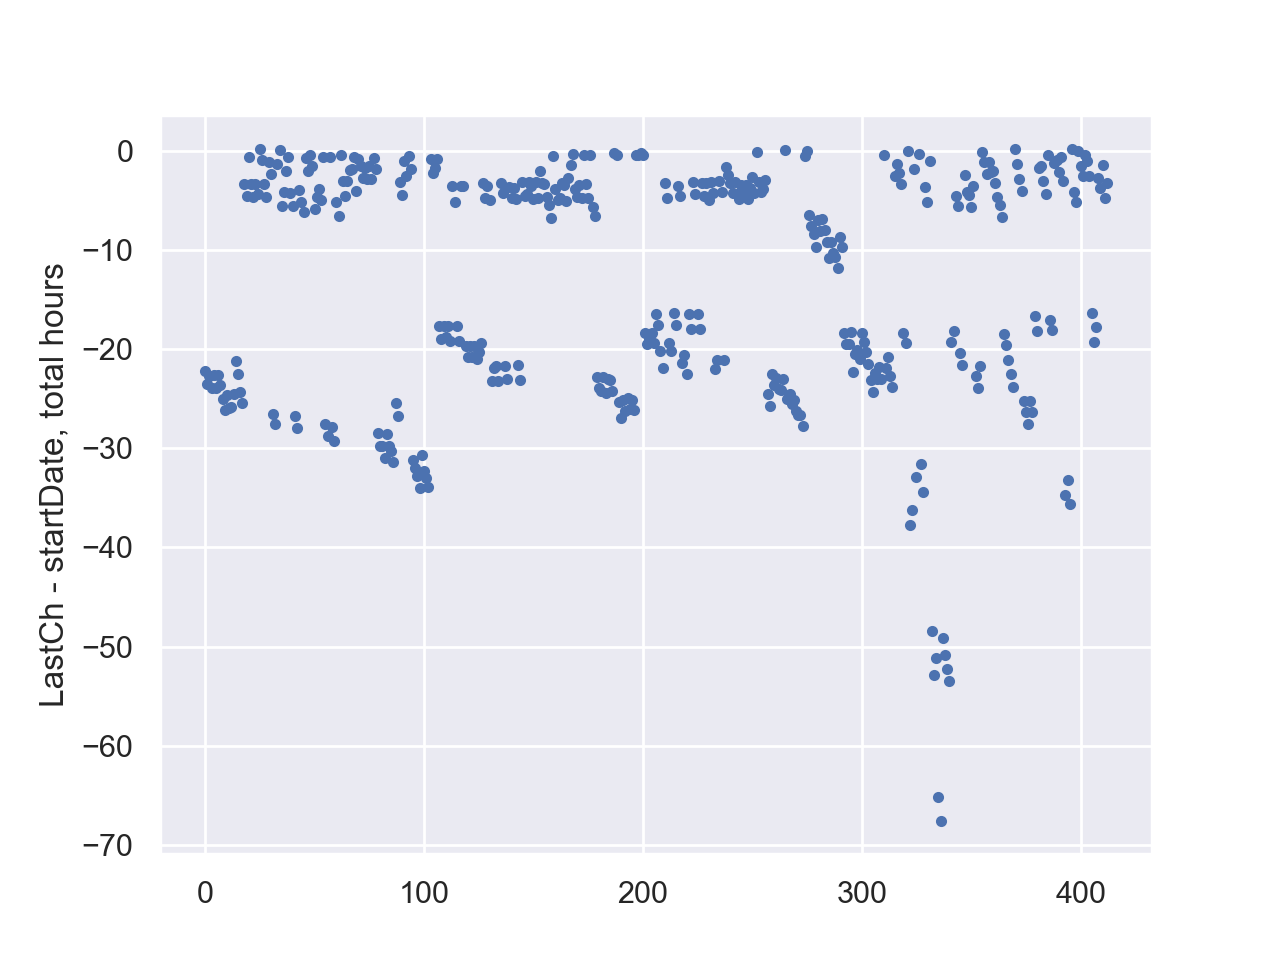

Text(0, 0.5, 'LastCh - startDate, total hours')

In [22]:
fig, ax = plt.subplots()
ax.plot((matched_fairlay.LastCh[sel] - matched_fairlay.startDate[sel]).dt.total_seconds().values / 60 / 60, '.')
ax.set_ylabel('LastCh - startDate, total hours')

Last (non-soft) change can be as much as 10 minutes after match start. Last change can also be as much as three days behind the match start date.